<a href="https://colab.research.google.com/github/2403a52009-bot/ML/blob/main/ml_Asn_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Lab 7: L2 Regularization (Ridge Regression)  
Course: Machine Learning  
Dataset Used: insurance.csv  

---
## Objective
Implement Linear Regression and Ridge Regression using the insurance dataset.
Compare performance using multiple alpha values.


## STEP 1 — Import Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


## STEP 2 — Load Dataset

In [2]:

df = pd.read_csv('insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Target: charges  
Features: age, bmi, children, smoker  
Smoker column encoded to numeric.


In [3]:

df['smoker'] = df['smoker'].map({'yes':1, 'no':0})

X = df[['age','bmi','children','smoker']]
y = df['charges']


## STEP 3 — Train-Test Split (80/20)

In [4]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## STEP 4 — Feature Scaling

In [5]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## STEP 5 — Linear Regression

In [6]:

lin_model = LinearRegression()
lin_model.fit(X_train_scaled, y_train)

y_pred_lin = lin_model.predict(X_test_scaled)

mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression")
print("MSE:", mse_lin)
print("RMSE:", rmse_lin)
print("R2:", r2_lin)


Linear Regression
MSE: 33981653.95019775
RMSE: 5829.378521780666
R2: 0.7811147722517887


## STEP 6 — Ridge Regression (α = 0.1, 1, 10, 100)

In [7]:

alphas = [0.1, 1, 10, 100]
results = {}

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[a] = (mse, rmse, r2)

    print("Alpha:", a)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2:", r2)
    print()


Alpha: 0.1
MSE: 33982227.34605835
RMSE: 5829.427703133331
R2: 0.7811110788505281

Alpha: 1
MSE: 33987477.22312754
RMSE: 5829.877976692783
R2: 0.781077262940931

Alpha: 10
MSE: 34048646.19152439
RMSE: 5835.121780350808
R2: 0.7806832567045574

Alpha: 100
MSE: 35377800.84957989
RMSE: 5947.9240790026815
R2: 0.7721218040905247



## STEP 7 — Compare Coefficients

In [8]:

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear_Coeff": lin_model.coef_
})

print(coef_df)


    Feature  Linear_Coeff
0       age   3616.318176
1       bmi   1978.420432
2  children    519.225287
3    smoker   9559.323158


## STEP 8 — Plot (Linear Regression)

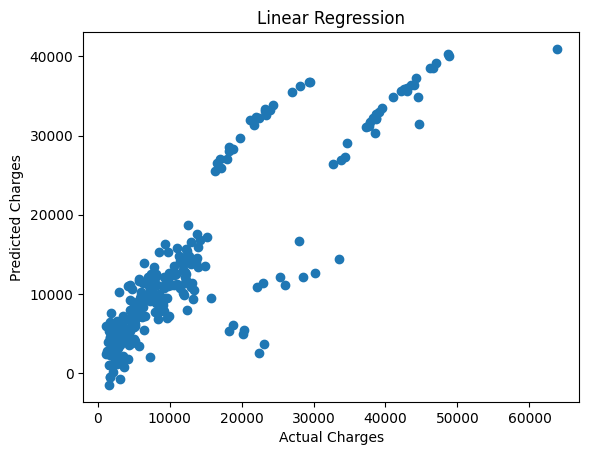

In [9]:

plt.figure()
plt.scatter(y_test, y_pred_lin)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Linear Regression")
plt.show()


## STEP 9 — Plot (Best Ridge Model)

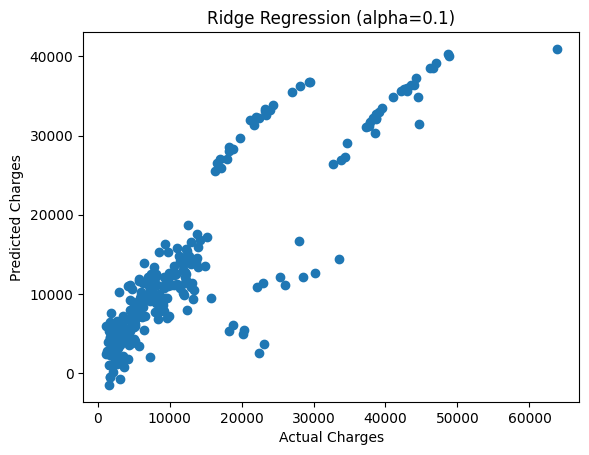

In [10]:

best_alpha = max(results, key=lambda x: results[x][2])

best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train_scaled, y_train)
y_pred_best = best_ridge.predict(X_test_scaled)

plt.figure()
plt.scatter(y_test, y_pred_best)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title(f"Ridge Regression (alpha={best_alpha})")
plt.show()



## Conclusion

Ridge Regression applies L2 regularization to reduce coefficient magnitude.
It helps reduce overfitting and improves model stability.
Best alpha selected based on highest R2 score.
